In [1]:
import numpy as np
import cv2
import sys

from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage
from sklearn import cluster

In [2]:
pwd

'/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/examples'

In [3]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [4]:
image = io.imread('../doc/TestVideo.tiff')

In [32]:
selected_frames = image[0::10]

In [33]:
frames, height, width = selected_frames.shape
print(frames)
print(height)
print(width)

1836
120
160


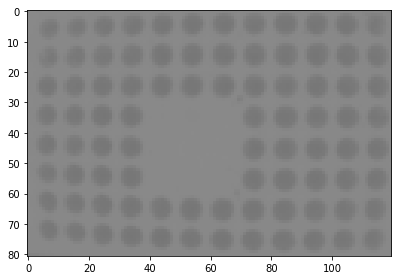

In [35]:
frame = selected_frames[1835][30:111,20:140]
io.imshow(frame)

In [36]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

(81, 120)

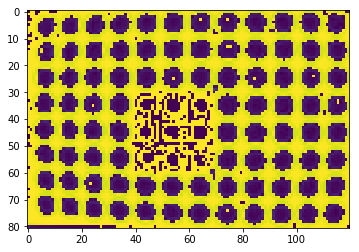

In [37]:
out_l = ndimage.convolve(frame, kernel_laplace, mode='reflect')
plt.imshow(out_l)
out_l.shape

In [38]:
maxpixel = np.amax(frame)
maxpixel

35384

In [39]:
z = frame.reshape(-1,1)

In [40]:
z = np.float32(z)
z.shape

(9720, 1)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=96, init='k-means++',n_init=10,max_iter=300).fit(z)
pic = kmeans.cluster_centers_[kmeans.labels_]

In [42]:
kmeans.cluster_centers_.shape

(96, 1)

In [43]:
kmeans.labels_.shape

(9720,)

In [44]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,96,None,criteria,1000,flags)


In [45]:
centers

array([[34842.145],
       [35052.066],
       [31218.006],
       [35162.33 ],
       [34730.18 ],
       [31292.28 ],
       [35209.65 ],
       [34970.297],
       [34878.07 ],
       [31487.166],
       [32741.945],
       [31913.047],
       [35292.05 ],
       [33604.285],
       [32957.516],
       [30739.85 ],
       [35140.332],
       [34960.855],
       [30800.21 ],
       [31876.135],
       [33748.383],
       [35271.477],
       [32010.166],
       [32392.53 ],
       [35065.754],
       [32583.414],
       [35008.   ],
       [35314.203],
       [34698.848],
       [31767.162],
       [35126.227],
       [31710.002],
       [35035.105],
       [33890.57 ],
       [31870.   ],
       [35008.   ],
       [35008.   ],
       [34753.324],
       [34893.01 ],
       [31573.295],
       [30446.586],
       [34862.184],
       [32664.342],
       [35232.49 ],
       [30549.787],
       [33460.805],
       [32132.512],
       [32888.1  ],
       [34304.414],
       [31412.012],
